In [14]:
import multiprocessing as mp
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle

In [2]:
SMALL_SIZE = 14
MEDIUM_SIZE = 18
BIGGER_SIZE = 22

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

plt.rcParams['figure.figsize'] = [8, 5]

In [3]:
def mundo_red_NWS(n_nodos, k, p, confinados = 0.3):

    G = nx.newman_watts_strogatz_graph(n_nodos, k, p, seed=None)
    numero_nodos_confinados = int(n_nodos * confinados)
    indices_nodo = list(range(0, G.number_of_nodes()))
    np.random.shuffle(indices_nodo)
    
    for ii in indices_nodo[0:numero_nodos_confinados]:
        G.remove_node(ii)
       
    for ii in list(G.nodes()):
        G.nodes[ii]["estado"] = 0 
    
    return G

def mundo_red_WS(n_nodos, k, p, confinados = 0.3):

    G = nx.connected_watts_strogatz_graph(n_nodos, k, p, tries=100)
    numero_nodos_confinados = int(n_nodos * confinados)
    indices_nodo = list(range(0, G.number_of_nodes()))
    np.random.shuffle(indices_nodo)
    
    for ii in indices_nodo[0:numero_nodos_confinados]:
        G.remove_node(ii)
       
    for ii in list(G.nodes()):
        G.nodes[ii]["estado"] = 0 
    
    return G

def mundo_red_BA(n_nodos, m, confinados = 0.3):
    
    G = nx.barabasi_albert_graph(n_nodos, m)
    numero_nodos_confinados = int(n_nodos * confinados)
    indices_nodo = list(range(0, G.number_of_nodes()))
    np.random.shuffle(indices_nodo)
    
    for ii in indices_nodo[0:numero_nodos_confinados]:
        G.remove_node(ii)
       
    for ii in list(G.nodes()):
        G.nodes[ii]["estado"] = 0 
    
    return G

def infeccion_inicial(G):
    
    if G.number_of_nodes() > 0:
    
        nodos_restantes = list(G.nodes())
        np.random.shuffle(nodos_restantes)
        paciente_cero = nodos_restantes[0]
        G.nodes[paciente_cero]["estado"] = 1

def propagacion_infeccion(G):
    
    if G.number_of_nodes() > 0:
    
        nuevos_infectados = []
    
        for ii in list(G.nodes()):
            if G.nodes[ii]["estado"] == 1:
                nuevos_infectados.append(ii)    
    
        while len(nuevos_infectados)>0:
            lista_auxiliar = []
            for nuevo_infectado in nuevos_infectados:
                for vecino in G.neighbors(nuevo_infectado):
                    if G.nodes[vecino]["estado"]==0:
                        G.nodes[vecino]["estado"]=1
                        lista_auxiliar.append(vecino)
            nuevos_infectados=lista_auxiliar

def porcentaje_infectados(G):
    
    if G.number_of_nodes() > 0:
    
        numero_infectados = 0
        for ii in list(G.nodes()):
            if G.nodes[ii]["estado"] == 1:
                numero_infectados += 1
            
        return numero_infectados/(G.number_of_nodes())
    else:
        return 0.0

def distribucion_grado(G):

    lista_grado = []

    for indice_nodo, grado_nodo in G.degree():
        lista_grado.append(grado_nodo)
    
    kmax=np.max(lista_grado)
    
    print('Kmax = {}'.format(kmax))
    print('Kmean = {}'.format(np.average(lista_grado)))
    
    frecuencia_grado = np.zeros(kmax+1)
    
    for ii in lista_grado:
        frecuencia_grado[ii] += 1

    x = np.linspace(0, kmax, num=kmax+1)

    y_sin_ceros = []
    x_sin_ceros = []

    for ii in range(len(frecuencia_grado)):
        if frecuencia_grado[ii]>0:
            y_sin_ceros.append(frecuencia_grado[ii])
            x_sin_ceros.append(x[ii])


    return x_sin_ceros, y_sin_ceros


# Newton Watson - Strogatz

In [ ]:
n_nodos = 10000
m = 6
p = 0.4
sistema = mundo_red_NWS(n_nodos, m, p, confinados=0)
hx,hy = distribucion_grado(sistema)
plt.scatter(hx, hy)
#plt.xscale('log')
#plt.yscale('log')
plt.show()

In [ ]:
def run(confinados):
    print(confinados)
    n_nodes=10000
    m=6
    p=0.4
    n_realizaciones=100
    lista_porcentaje_infectados = []
    for _ in range(n_realizaciones):
        sistema = mundo_red_NWS(n_nodes, m, p, confinados)
        infeccion_inicial(sistema)
        propagacion_infeccion(sistema)
        porcentaje = porcentaje_infectados(sistema)
        lista_porcentaje_infectados.append(porcentaje)
    return confinados, np.mean(lista_porcentaje_infectados)

In [ ]:
confinados = np.linspace(0.0, 1.0, num=21)
pool = mp.Pool(4)
result = pool.map(run, confinados)
pool.close()
result=np.array(result)
argsort = np.argsort(result[:,0])
confinados=result[argsort,0]
infectados_promedio=result[argsort,1]

In [ ]:
plt.plot(confinados*100,np.array(infectados_promedio)*100)
plt.axvline(x=59, ymin=0, ymax=1, color="red")
plt.ylabel("% Infectados")
plt.xlabel("% en confinamiento")
plt.show()

# Compact Watson - Strogatz

Kmax = 17
Kmean = 8.0


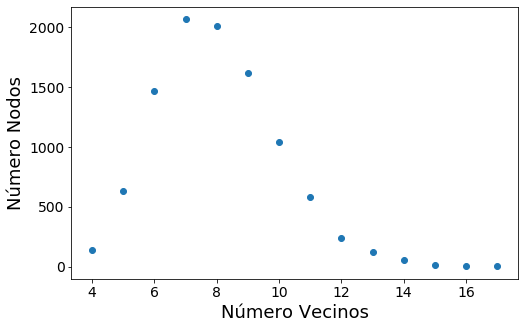

In [7]:
n_nodos = 10000
m = 8
p = 0.7
sistema = mundo_red_WS(n_nodos, m, p, confinados=0)
hx,hy = distribucion_grado(sistema)

plt.rcParams['figure.figsize'] = [8, 5]
plt.scatter(hx, hy)
plt.ylabel("Número Nodos")
plt.xlabel("Número Vecinos")
plt.savefig('dist_grado_WS.png', dpi=300, transparent=True)
plt.show()

In [10]:
def run(confinados):
    print(confinados)
    n_nodes=10000
    m=8
    p=0.7
    n_realizaciones=500
    lista_porcentaje_infectados = []
    for _ in range(n_realizaciones):
        sistema = mundo_red_WS(n_nodes, m, p, confinados)
        infeccion_inicial(sistema)
        propagacion_infeccion(sistema)
        porcentaje = porcentaje_infectados(sistema)
        lista_porcentaje_infectados.append(porcentaje)
    return confinados, np.mean(lista_porcentaje_infectados)

In [11]:
confinados = np.linspace(0.0, 1.0, num=31)
pool = mp.Pool(4)
result = pool.map(run, confinados)
pool.close()
result=np.array(result)
argsort = np.argsort(result[:,0])
confinados=result[argsort,0]
infectados_promedio=result[argsort,1]

0.0
0.2
0.06666666666666667
0.13333333333333333
0.23333333333333334
0.16666666666666666
0.03333333333333333
0.1
0.26666666666666666
0.3333333333333333
0.4
0.4666666666666667
0.3
0.36666666666666664
0.5
0.43333333333333335
0.5333333333333333
0.6
0.6666666666666666
0.7333333333333333
0.7666666666666666
0.7
0.6333333333333333
0.5666666666666667
0.8
0.8666666666666667
0.9333333333333333
1.0
0.8333333333333334
0.9
0.9666666666666667


In [15]:
if False:
    fff = open('data_WS.oup','wb')
    pickle.dump(confinados,fff)
    pickle.dump(infectados_promedio,fff)
    fff.close()

In [16]:
if False:
    fff = open('data_WS.oup','rb')
    ooo = pickle.load(fff)
    inf = pickle.load(fff)
    fff.close()

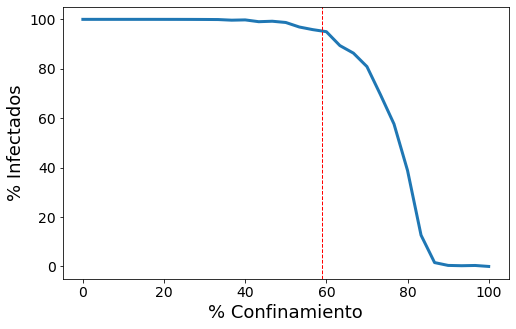

In [23]:
plt.plot(confinados*100,np.array(infectados_promedio)*100, lw=3)
plt.axvline(x=59, ymin=0, ymax=1, color="red", lw=1, ls='--')
plt.ylabel("% Infectados")
plt.xlabel("% Confinamiento")
plt.savefig('transicion_WS.png', dpi=300, transparent=True)
plt.show()

# Barabasi - Albert

Kmax = 436
Kmean = 7.9968


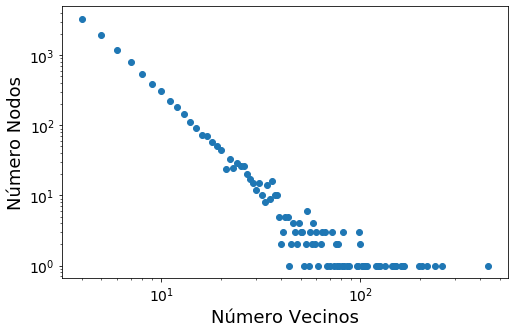

In [9]:
n_nodos = 10000
m = 4
sistema = mundo_red_BA(n_nodos, m, confinados=0)
hx,hy = distribucion_grado(sistema)

plt.rcParams['figure.figsize'] = [8, 5]
plt.scatter(hx, hy)
plt.yscale('log')
plt.xscale('log')
plt.ylabel("Número Nodos")
plt.xlabel("Número Vecinos")
plt.savefig('dist_grado_BA.png', dpi=300, transparent=True)
plt.show()

In [31]:
def run(confinados):
    print(confinados)
    n_nodes=10000
    m=4
    n_realizaciones=1000
    lista_porcentaje_infectados = []
    for _ in range(n_realizaciones):
        sistema = mundo_red_BA(n_nodes, m, confinados)
        infeccion_inicial(sistema)
        propagacion_infeccion(sistema)
        porcentaje = porcentaje_infectados(sistema)
        lista_porcentaje_infectados.append(porcentaje)
    return confinados, np.mean(lista_porcentaje_infectados)

In [32]:
confinados = np.linspace(0.0, 1.0, num=31)
pool = mp.Pool(4)
result = pool.map(run, confinados)
pool.close()
result=np.array(result)
argsort = np.argsort(result[:,0])
confinados=result[argsort,0]
infectados_promedio=result[argsort,1]

0.0
0.13333333333333333
0.2
0.06666666666666667
0.23333333333333334
0.16666666666666666
0.1
0.03333333333333333
0.26666666666666666
0.3333333333333333
0.4
0.4666666666666667
0.3
0.36666666666666664
0.43333333333333335
0.5
0.5333333333333333
0.6
0.6666666666666666
0.7333333333333333
0.7666666666666666
0.7
0.6333333333333333
0.5666666666666667
0.8
0.8666666666666667
0.9333333333333333
1.0
0.8333333333333334
0.9
0.9666666666666667


In [34]:
if False:
    fff = open('data_BA.oup','wb')
    pickle.dump(confinados,fff)
    pickle.dump(infectados_promedio,fff)
    fff.close()

In [35]:
if False:
    fff = open('data_BA.oup','rb')
    ooo = pickle.load(fff)
    inf = pickle.load(fff)
    fff.close()

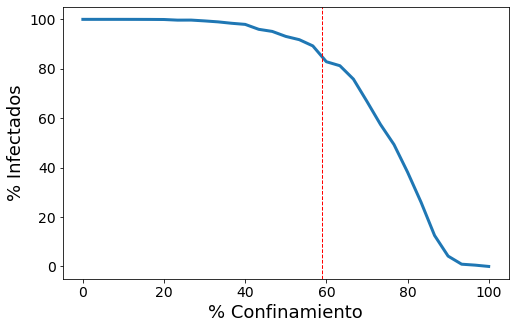

In [33]:
plt.plot(confinados*100,np.array(infectados_promedio)*100, lw=3)
plt.axvline(x=59, ymin=0, ymax=1, color="red", lw=1, ls='--')
plt.ylabel("% Infectados")
plt.xlabel("% Confinamiento")
plt.savefig('transicion_BA.png', dpi=300, transparent=True)
plt.show()